In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import csv

In [88]:
column_init=["STRTTIME","ENDTIME",'TRVLCMIN', 'R_SEX', 'R_AGE', 'WRKCOUNT','HHVEHCNT', 'HHSIZE','EDUC','WHYTRP1S','HHFAMINC']
df = pd.read_csv('C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\NHTS Data Parser\\HH Data Parser\\trippub.csv')
X = pd.read_csv('C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\NHTS Data Parser\\HH Data Parser\\trippub.csv',usecols=column_init)
X = X.drop(columns=['WHYTRP1S'])
y = df['WHYTRP1S']

In [89]:
# Preprocess the target variable using LabelEncoder
y_label_encoder = LabelEncoder()
y_encoded = y_label_encoder.fit_transform(y)

# Convert the target variable to one-hot encoded format
num_classes = len(y_label_encoder.classes_)
y_one_hot = pd.get_dummies(y_encoded)

In [90]:
X.shape

(923572, 10)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# X_train=X.astype('float64')
# num_classes
# Standardize the features (optional, but often recommended for neural networks)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
input_shape = X_train.shape[1]

In [92]:
print(X_train_scaled.shape)
print(y_train.shape)

(738857, 10)
(738857, 9)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# model = Sequential()

# # Add layers to the model
# model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=3, batch_size=32, validation_data=(X_test_scaled, y_test))
# model.fit(X_train, y, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/3
23090/23090 [==============================] - 18s 766us/step - loss: 1.6270 - accuracy: 0.4329 - val_loss: 1.5951 - val_accuracy: 0.4419
Epoch 2/3
23090/23090 [==============================] - 18s 761us/step - loss: 1.5918 - accuracy: 0.4428 - val_loss: 1.5799 - val_accuracy: 0.4452
Epoch 3/3
5773/5773 [==============================] - 3s 599us/step - loss: 1.5713 - accuracy: 0.4471
Test loss: 1.5712833404541016
Test accuracy: 0.44706711173057556


In [94]:
feature_list = [
    "TREGR_WLK",
    "LOOP_TRIP",
    "LIF_CYC",
    "DRIVER",
    "TRACC_SUB",
    "DBHTNRNT",
    "TDAYDATE",
    "VEHTYPE",
    "TREGR_BUS",
    "ONTD_P11",
    "DRVR_FLG",
    "TRACC_WLK",
    "ONTD_P9",
    "VEHID",
    "ONTD_P7",
    "OTEEMPDN",
    "TRAVDAY",
    "DWELTIME",
    "ENDTIME",
    "WORKER",
    "ONTD_P8",
    "NUMTRANS",
    "OBRESDN",
    "TRWAITTM",
    "GASPRICE",
    "TRPACCMP",
    "TREGRTM",
    "TDCASEID",
    "DTRESDN",
    "TREGR_CRL",
    "ONTD_P3",
    "WHODROVE",
    "TRACC_CRL",
    "PSGR_FLG",
    "TREGR_POV",
    "HHMEMDRV",
    "OTRESDN",
    "HH_ONTD",
    "TRPHHACC",
    "STRTTIME",
    "OTHTNRNT",
    "ONTD_P1",
    "TRPMILAD",
    "DTPPOPDN",
    "ONTD_P10",
    "ONTD_P12",
    "VMT_MILE",
    "ONTD_P6",
    "DROP_PRK",
    "DTHTNRNT",
    "TRACCTM",
    "ONTD_P5",
    "TRACC_BUS",
    "OBPPOPDN",
    "TRACC_POV",
    "ONTD_P4",
    "TRPTRANS",
    "TRACC_OTH",
    "NUMONTRP",
    "PUBTRANS",
    "TRPHHVEH",
    "DBPPOPDN",
    "PERSONID",
    "TREGR_SUB",
    "TDWKND",
    "DBRESDN",
    "ONTD_P2",
    "OTPPOPDN",
    "TDTRPNUM",
    "DTEEMPDN",
    "TREGR_OTH",
    "TRPMILES",
    "TRVLCMIN",
    "NONHHCNT",
    "ONTD_P13",
    "WTTRDFIN",
    "WHYTRP90"
]


In [95]:
non_int64_columns = X.dtypes[X.dtypes != 'int64']
print(non_int64_columns)

Series([], dtype: object)


In [96]:
df['TREGR_WLK'].value_counts()

TREGR_WLK
-1    912482
 1      8458
 2      2582
-9        50
Name: count, dtype: int64

In [97]:
results = []
accuracy=0
count=0
for feature in feature_list:
    print("iteration",count,'/',len(feature_list),' DOIN',feature)
    X[feature] = df[feature]
    X_modified = X.copy()
    # print(df[feature].value_counts())

    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_modified_train_scaled = scaler.fit_transform(X_train)
    X_modified_test_scaled = scaler.transform(X_test)
    # print(X_train.shape)
    # print(y_train.shape)
    model = Sequential()
    model.add(Dense(64, input_dim=X_modified_train_scaled.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_modified_train_scaled, y_train, epochs=3, batch_size=32, validation_data=(X_modified_test_scaled, y_test))

    # model.fit(X_train, y_train)
    # accuracy_dropped = model.score(X_test, y_test)
    # accuracy = 0.9918360710144043
    loss, accuracy_gained = model.evaluate(X_modified_test_scaled, y_test)
    results.append((feature, accuracy_gained - accuracy))
    accuracy=accuracy_gained
    count+=1

iteration 0 / 77  DOIN TREGR_WLK


Epoch 1/3
23090/23090 [==============================] - 20s 838us/step - loss: 1.5966 - accuracy: 0.4400 - val_loss: 1.5713 - val_accuracy: 0.4458
Epoch 2/3
23090/23090 [==============================] - 18s 767us/step - loss: 1.5711 - accuracy: 0.4458 - val_loss: 1.5641 - val_accuracy: 0.4476
Epoch 3/3
5773/5773 [==============================] - 3s 578us/step - loss: 1.5588 - accuracy: 0.4491
iteration 1 / 77  DOIN LOOP_TRIP
Epoch 1/3
23090/23090 [==============================] - 19s 800us/step - loss: 1.5845 - accuracy: 0.4462 - val_loss: 1.5676 - val_accuracy: 0.4502
Epoch 2/3
23090/23090 [==============================] - 18s 791us/step - loss: 1.5584 - accuracy: 0.4518 - val_loss: 1.5527 - val_accuracy: 0.4541
Epoch 3/3
5773/5773 [==============================] - 3s 569us/step - loss: 1.5494 - accuracy: 0.4537
iteration 2 / 77  DOIN LIF_CYC
Epoch 1/3
23090/23090 [==============================] - 18s 784us/step - loss: 1.5859 - accuracy: 0.4452 - val_loss: 1.5577 - val_accurac

In [98]:
results


[('TREGR_WLK', 0.4491351544857025),
 ('LOOP_TRIP', 0.00451505184173584),
 ('LIF_CYC', -0.0006171464920043945),
 ('DRIVER', 0.001683652400970459),
 ('TRACC_SUB', 0.00033023953437805176),
 ('DBHTNRNT', 0.01683133840560913),
 ('TDAYDATE', -0.0005900859832763672),
 ('VEHTYPE', 0.003237426280975342),
 ('TREGR_BUS', -0.000557631254196167),
 ('ONTD_P11', 0.0005738735198974609),
 ('DRVR_FLG', 0.003123730421066284),
 ('TRACC_WLK', -0.002360403537750244),
 ('ONTD_P9', 0.0006279945373535156),
 ('VEHID', 4.8726797103881836e-05),
 ('ONTD_P7', 0.0009744763374328613),
 ('OTEEMPDN', 5.9545040130615234e-05),
 ('TRAVDAY', 0.006875455379486084),
 ('DWELTIME', 0.14398398995399475),
 ('ENDTIME', 0.002192556858062744),
 ('WORKER', 0.001061081886291504),
 ('ONTD_P8', -0.0011314749717712402),
 ('NUMTRANS', 0.000866234302520752),
 ('OBRESDN', 0.0009961128234863281),
 ('TRWAITTM', 0.0010231733322143555),
 ('GASPRICE', 0.00039523839950561523),
 ('TRPACCMP', 0.0037192106246948242),
 ('TREGRTM', 0.0036759376525878

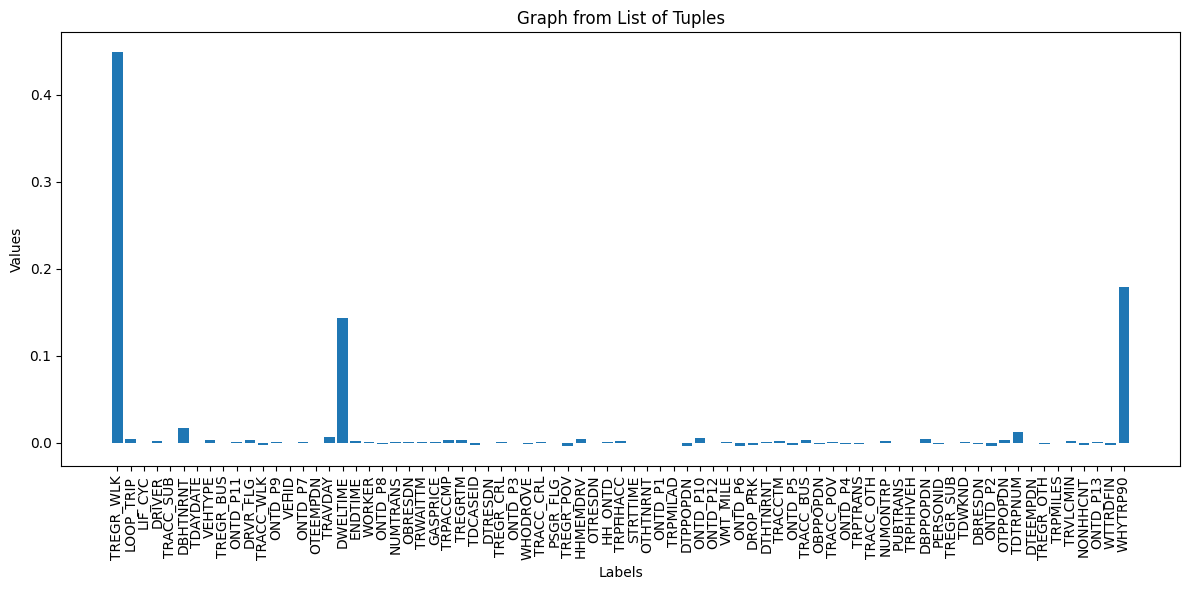

In [99]:
import matplotlib.pyplot as plt
labels, values = zip(*results)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Graph from List of Tuples')
plt.tight_layout()

# Show the plot
plt.show()